In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

In [29]:
cereal = pd.read_csv('cereal.csv')
cereal.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


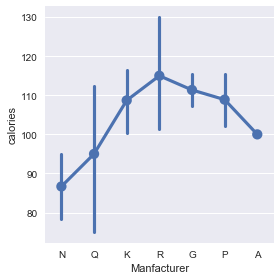

In [30]:
sugar = cereal['sugars']
cal = cereal['calories']
ax1 = sns.factorplot(x='mfr', y='calories', data=cereal)
plt.xlabel('Manfacturer')
plt.show()



Factor plot of the calories in cereal organized by manufacturer. Good for seeing who makes high and low calorie cereals, but lacks detail in the number of cereals represented. 

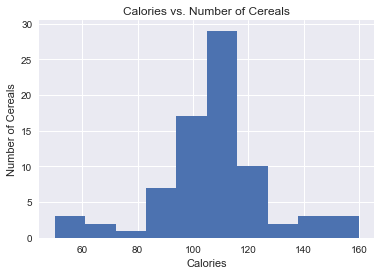

In [8]:
ax2 = plt.hist(cal)
plt.xlabel('Calories')
plt.ylabel('Number of Cereals')
plt.title('Calories vs. Number of Cereals')
plt.show()


Histogram of calorie counts. Good to see min and max calories, and their distribution. 

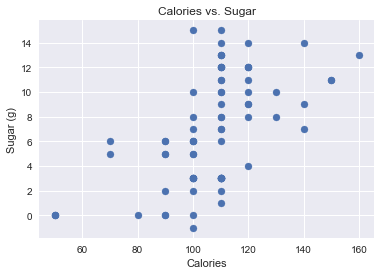

In [12]:
ax3 = plt.scatter(cal,sugar)
plt.xlabel('Calories')
plt.ylabel('Sugar (g)')
plt.title('Calories vs. Sugar')
plt.show()


Scatter plot of calories vs. sugar. Shows a positive correlation between calories and sugar, as expected.

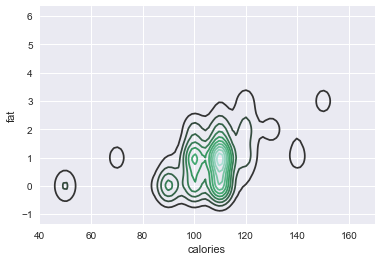

In [27]:
fat = cereal['fat']
ax4 = sns.kdeplot(cal,fat)
plt.show()

Kernel density plot of calories vs. fat. Looks cool, helps see where calories and fat most coincide, not great for data outside the central blob. 

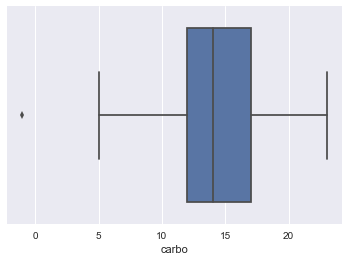

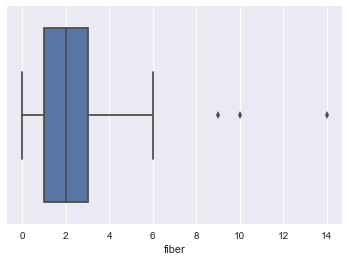

In [47]:
carbs = cereal['carbo']
fiber = cereal['fiber']
sns.boxplot(carbs)
plt.show()
sns.boxplot(fiber)
plt.show()

Boxplots of carbohydrates and fiber. Good for seeing mean, min, max, and outliers, but doesn't give fine details on the distribution.

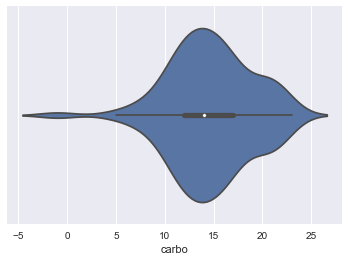

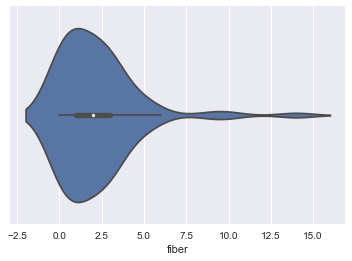

In [48]:
sns.violinplot(carbs)
plt.show()
sns.violinplot(fiber)
plt.show()

Violin plots of carbohydrates and fiber. Gives more detail on the distribution than the Boxplot.

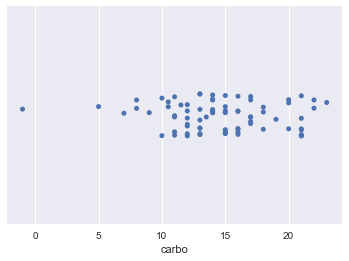

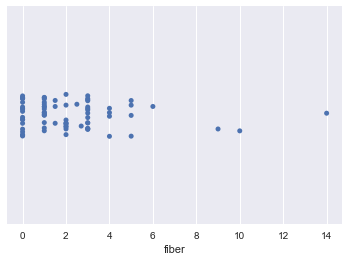

In [51]:
sns.stripplot(carbs,jitter=True)
plt.show()
sns.stripplot(fiber,jitter=True)
plt.show()

Strip plot of carbohydrates and fiber. Easy to tell most common values, not as pretty as the violin plots. 

In [33]:
beers = pd.read_csv('beers.csv')
beers = beers.dropna()
breweries = pd.read_csv('breweries.csv')
breweries.rename(columns={'Unnamed: 0':'id'},inplace=True)
beers1 = beers.merge(breweries, on='id',how='outer')
beers1 = beers1.dropna()
beers1.head()

,Unnamed: 0,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
10,31.0,0.085,52.0,531,Special Edition: Allies Win The War!,English Strong Ale,368.0,12.0,Dolores River Brewery,Dolores,CO
11,32.0,0.097,94.0,432,Hop Crisis,American Double / Imperial IPA,368.0,12.0,Seabright Brewery,Santa Cruz,CA
12,33.0,0.044,42.0,353,Bitter American (2011),American Pale Ale (APA),368.0,12.0,Aslan Brewing Company,Bellingham,WA
13,34.0,0.079,45.0,321,Fireside Chat (2010),Winter Warmer,368.0,12.0,Rivertown Brewing Company,Lockland,OH
14,35.0,0.068,65.0,173,Back in Black,American Black Ale,368.0,12.0,Evil Twin Brewing,Brooklyn,NY


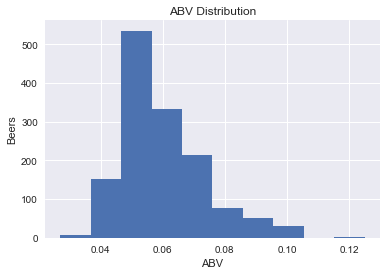

In [19]:
plt.hist(beers['abv'])
plt.xlabel('ABV')
plt.ylabel('Beers')
plt.title('ABV Distribution')
plt.show()

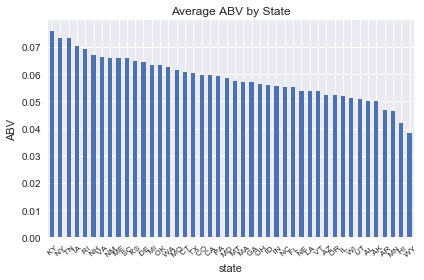

In [18]:
beers1.groupby('state').abv.mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=8, rotation=40, multialignment = 'left')
plt.ylabel('ABV')
plt.title('Average ABV by State')
plt.tight_layout()

plt.show()

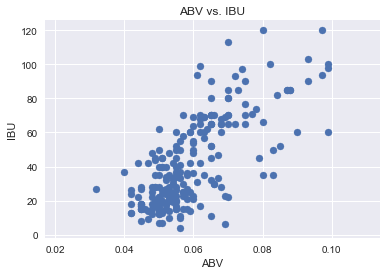

In [20]:
plt.scatter(beers1['abv'],beers1['ibu'])
plt.xlabel('ABV')
plt.ylabel('IBU')
plt.title('ABV vs. IBU')
plt.show()

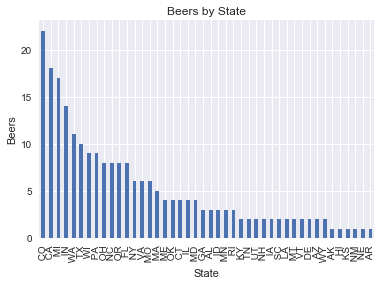

In [21]:
beers1.state.value_counts().plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Beers')
plt.title('Beers by State')


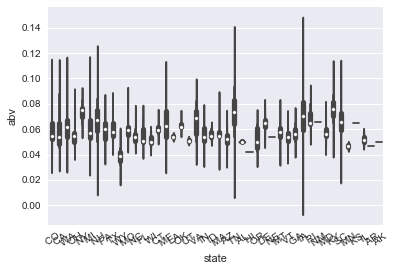

In [32]:
sns.violinplot(x='state',y='abv',data=beers1)
plt.xticks(rotation=35)
plt.show()

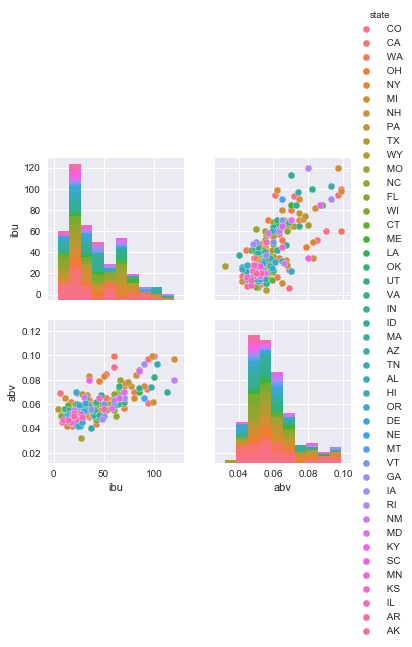

In [6]:
sns.pairplot(data=beers1[['ibu','abv','state']], hue='state')
plt.show()